# Cross check and annotate screens
## Carmen Martin

### Goals:
1. Check what substrates may be missing from the universal peptide library created
2. Create dictionary with names
3. Check that we have the sequences for all peptides included in the screens that will be incorporated in the data base
4. Rename screen input files with universal Sx nomenclatire


In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import collections

In [183]:
data=pd.read_excel('Inputs/Peptide_inventory_paa_21_9_4.xlsx', sheet_name='All sequences PAA ', index_col=0)
data

,LUAD panel,In-house name,LCS panel,BV panel,Sequence,Composition
PAA,,,,,,
S1,NaN,NaN,LQ1,NaN,GRQRRVVGG,Natural
S2,NaN,NaN,LQ2,NaN,GRQARAVGG,Natural
S3,NaN,NaN,LQ3,NaN,GRRARVVGG,Natural
S4,PP04,Q6,LQ4,NaN,GPLGLRSWG,Natural
S5,NaN,NaN,LQ5,NaN,GWEAVRSAMWG,Natural
...,...,...,...,...,...,...
S205,NaN,BV13,NaN,NaN,GGPRAAA[Phe(homo)]TSPG,Non-natural
S206,NaN,BV14,NaN,NaN,GGTGPPGYTG,Natural
S207,NaN,BV15,NaN,NaN,GGTGLPVYQG,Natural


In [184]:
# Collect all names and append to list to check missing substrates
luad = list(data['LUAD panel']. dropna().values)
house = list(data['In-house name']. dropna().values)
lcs = list(data['LCS panel']. dropna().values)
bv = list(data['BV panel']. dropna().values)

all_pep = luad + house + lcs + bv
len(all_pep)

print(sorted(all_pep))

['BV01', 'BV02', 'BV03', 'BV04', 'BV05', 'BV06', 'BV07', 'BV08', 'BV09', 'BV10', 'BV11', 'BV12', 'BV13', 'BV14', 'BV15', 'BV16', 'BV17', 'BV18', 'BV19', 'BV20', 'LQ1', 'LQ10', 'LQ11', 'LQ13', 'LQ16', 'LQ17', 'LQ18', 'LQ19', 'LQ2', 'LQ20', 'LQ21', 'LQ22', 'LQ23', 'LQ24', 'LQ25', 'LQ26', 'LQ28', 'LQ29', 'LQ3', 'LQ30', 'LQ31', 'LQ32', 'LQ33', 'LQ34', 'LQ35', 'LQ36', 'LQ37', 'LQ38', 'LQ39', 'LQ4', 'LQ40', 'LQ42', 'LQ43', 'LQ45', 'LQ46', 'LQ47', 'LQ48', 'LQ49', 'LQ5', 'LQ50', 'LQ51', 'LQ52', 'LQ53', 'LQ54', 'LQ55', 'LQ56', 'LQ57', 'LQ58', 'LQ59', 'LQ60', 'LQ61', 'LQ62', 'LQ63', 'LQ64', 'LQ65', 'LQ66', 'LQ67', 'LQ68', 'LQ69', 'LQ7', 'LQ70', 'LQ71', 'LQ72', 'LQ73', 'LQ74', 'LQ75', 'LQ76', 'LQ77', 'LQ79', 'LQ8', 'LQ81', 'LQ82', 'LQ83', 'LQ84', 'LQ85', 'LQ86', 'LQ87', 'LQ9', 'PP01', 'PP02', 'PP03', 'PP04', 'PP05', 'PP06', 'PP07', 'PP08', 'PP09', 'PP10', 'PP11', 'PP12', 'PP13', 'PP14', 'PP15', 'PQ1', 'PQ10', 'PQ11', 'PQ12', 'PQ13', 'PQ14', 'PQ15', 'PQ16', 'PQ17', 'PQ18', 'PQ19', 'PQ2', 'PQ20', '

In [185]:
print(len(all_pep)) # This number adds up to the expected number based on the individual libraries queried
# Note FX peptides still missing


259


In [186]:
# output all unique amino acids in the library --> doesnt work well, instead make non-natural amino acid list available through manually generated table
seqs = 'G'
for el in data['Sequence'].values:
    #print(seqs)
    #print(el)
    seqs=seqs + el


''.join(collections.OrderedDict.fromkeys( seqs).keys())


'GRQVAPLSWEMIFNTK D[Orn]HYgsfChay(e)vlomBzipc-t2bu'

In [187]:
# alternative to view non-natural amino acids in the library
non_nat = pd.read_excel('Inputs/Peptide_inventory_paa_21_9_4.xlsx', sheet_name='Non-natural amino acids', index_col=0)
non_nat

,Name
Abbreviation,
Orn,Ornithine
Cha,L-Cyclohexylalanine
Cys(Me),L-Methylcysteine
Nval,Norvaline
Cys(OMeBzl),S-para-methoxybenzyl cysteine
Pip,pipecolic acid
Phe(homo),L-Homo-Phenylalanine
Tic,Tetrahydroisoquinolinecarboxylic acid
Nle(O-Bzl),Hydroxynorleucine(Bzl)


In [188]:
# Create dictionary with names
names = data.iloc[:,:-2]
keys = names.index.to_list()

values_luad = list(data['LUAD panel'].values)
values_house = list(data['In-house name'].values)
values_lcs = list(data['LCS panel'].values)
values_bv = list(data['BV panel'].values)

vals = []
for row in np.arange(names.shape[0]):
    vals.append(list(names.loc[keys[row]].dropna().values))

names_dict = dict(zip(keys,vals))   

In [189]:
# View and save dictionary as pickle file
print(names_dict)

names_dict_f = open("names_dict.pickle", "wb")

pickle.dump(names_dict, names_dict_f)

{'S1': ['LQ1'], 'S2': ['LQ2'], 'S3': ['LQ3'], 'S4': ['PP04', 'Q6', 'LQ4'], 'S5': ['LQ5'], 'S6': ['LQ7'], 'S7': ['LQ8'], 'S8': ['LQ9'], 'S9': ['LQ10'], 'S10': ['LQ11'], 'S11': ['LQ13'], 'S12': ['LQ16'], 'S13': ['Q2', 'LQ17'], 'S14': ['LQ18'], 'S15': ['LQ19'], 'S16': ['PP08', 'PQ2', 'LQ20', 'BV08'], 'S17': ['PQ12', 'LQ21'], 'S18': ['PQ20', 'LQ22'], 'S19': ['PP10', 'PQ4', 'LQ23'], 'S20': ['LQ24'], 'S21': ['LQ25'], 'S22': ['PP09', 'PQ3', 'LQ26'], 'S23': ['LQ28'], 'S24': ['PP15', 'PX12', 'LQ29'], 'S25': ['LQ30'], 'S26': ['PQ1', 'LQ31'], 'S27': ['TQ48', 'PQ11', 'LQ32', 'BV09'], 'S28': ['LQ33'], 'S29': ['LQ34'], 'S30': ['PX02', 'LQ35'], 'S31': ['LQ36'], 'S32': ['LQ37'], 'S33': ['LQ38'], 'S34': ['LQ39'], 'S35': ['LQ40'], 'S36': ['PX14', 'LQ42'], 'S37': ['LQ43'], 'S38': ['PX25', 'LQ45'], 'S39': ['LQ46'], 'S40': ['LQ47'], 'S41': ['LQ48'], 'S42': ['LQ49'], 'S43': ['LQ50'], 'S44': ['LQ51'], 'S45': ['LQ52'], 'S46': ['LQ53'], 'S47': ['LQ54'], 'S48': ['LQ55'], 'S49': ['LQ56'], 'S50': ['LQ57'], 'S51':

In [190]:
"""
Created on Tue Oct 20 10:03:20 2020

@author: mariaalonso
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle


class DataLoader(object):
    """DataLoader class for screeening data"""
    def __init__(self, protease=None, substrate=None, plot_his=True, hist_density=False, z_threshold=None):
        
        # Make dictionary with all raw and zscored screening data
        self.raw = {}
        self.screens = {}
        self.substrates = {}
        self.proteases = {}
        keys = ['Bhatia1', 'Bhatia2', 'Bhatia3', 'GlympseBio1', 'GlympseBio2']
        files = ['Inputs/JesseScreen_updated.csv', 'Inputs/JaideepScreen_updated.csv', 
                 'Inputs/CarmenScreen_updated.csv', 'Inputs/AndrewScreen_feb_updated.csv', 
                 'Inputs/AndrewScreen_dec_updated.csv']
        
        for i, element in enumerate(files):
            self.raw[keys[i]], self.substrates[keys[i]], self.proteases[keys[i]] = self.load(element, z_score = False)
            self.screens[keys[i]], _, _ = self.load(element, z_score = True)
        
        num_substrates = []
        num_proteases = []
        for key in self.substrates.keys():
            num_substrates.append(len(self.substrates[key]))
            num_proteases.append(len(self.proteases[key]))
            
        # Plot bargraph of number of substrates
        self.bar_graph(num_substrates, self.substrates.keys(), '# Peptides', '# Peptides/screen', 1) 
        self.bar_graph(num_proteases, self.proteases.keys(), '# Proteases', '# Proteases/screen', 2)
        
        # Look up protease or substrate
        if protease != None:
            top_id = self.lookup_protease(protease, z_threshold=z_threshold, plot_his=plot_his, den=hist_density)
            # f1 = open('outputs/lookup_'+protease+'.pkl', 'wb')
            # pickle.dump(self.temp_prot, f1)
            # f1.close()
            
            #print('Best substrates for '+ protease+': '+ str(top_id))
            #for el in top_id:
            #    cross_temp = self.lookup_substrate(el, z_threshold=z_threshold, plot_his=plot_his, den=hist_density)
            #    print('Cross-cutting of '+ el +' by: '+ str(cross_temp))
                # cross_cutting =  cross_cutting + cross_temp
            # cross_cutting = list(set(cross_cutting))
            # print('Cross-cutting by'+ protease+': '+ str(top_id))
                
            
        if substrate != None:
            top_id = self.lookup_substrate(substrate, z_threshold=z_threshold, plot_his=plot_his, den=hist_density)
            # f2 = open('outputs/lookup_'+substrate+'.pkl', 'wb')
            # pickle.dump(self.temp_subs, f2)
            # f2.close()
            
            #print(substrate +' is best cleavaed by: '+ str(top_id))
            #for el in top_id:
            #   cross_temp = self.lookup_protease(el, z_threshold=z_threshold, plot_his=plot_his, den=hist_density)
                # print('Other substrates well cleavaed by '+ el +': '+ str(cross_temp))
        
        
        
    def load(self, path, z_score=False):
        """load and zscore screeening data"""
        raw = pd.read_csv(path)
        data = raw.groupby('Substrate').mean().reset_index() # average duplicates
        substrates = list(data['Substrate'])
        proteases = list(data.iloc[:,1:].columns)
        proteases = [item.replace(' ', '') for item in proteases] #Correct for possible spaces
        data.columns = ['Substrate']+proteases  #Change names in df
        if z_score == True:
            data = data.set_index('Substrate')
            data = ((data - data.mean()) / data.std(ddof=0))
            # data = data.reset_index()
        return data, substrates, proteases

    def bar_graph(self, x_val, x_labels, y_label, title, num_fig):
        fig, ax = plt.subplots()
        x_len = np.arange(len(x_val))
        plt.bar(x_len, x_val)
        plt.xticks(x_len, (x_labels))
        plt.title(title)
        plt.ylabel(y_label)
        plt.show()
        fig.savefig('outputs/Fig'+str(num_fig)+'.png')
    
    def hist(self, val, x_label, y_label, title, identity, den):
        fig, ax = plt.subplots()
        n, bins, patches = plt.hist(val, density=den, alpha=0.75)
        plt.title(title+' '+identity)
        plt.ylabel(y_label)
        plt.xlabel(x_label)
        plt.show()
        if den == False:
            fig.savefig('outputs/Fig_'+identity+'.png')
        else:
            fig.savefig('outputs/Fig_'+identity+'_normalized.png')
        
    def lookup_protease(self, protease, z_threshold=None, plot_his=True, den=False):
        self.temp_prot={} # build dictionary
        for key in self.proteases.keys(): 
            if protease in self.proteases[key]:
                print(protease+' in '+ key)
                self.temp_prot[key] = self.screens[key][protease]
        if plot_his == True:
            all_zscores = self.get_dict_vals(self.temp_prot)
            self.hist(all_zscores, 'z_scores', 'Frequency', 'Z-score distributions', protease, den)
        df_temp_prot1 = pd.DataFrame.from_dict(self.temp_prot) 
        df_temp_prot1.to_csv('outputs/'+protease+'_all_zscores.csv') # store dataframe option 1
        
        self.filtered = self.filter_z_score(self.temp_prot, z_threshold) # sort and filter data
        top_id = self.find_top_id(self.filtered)  #return id of top substrates 
        
        df_temp_prot2= pd.DataFrame() # build dataframe
        col = []
        for key in self.proteases.keys(): 
            if protease in self.proteases[key]:
                sorted_data = self.filtered[key]
                subs_temp = pd.DataFrame(list(sorted_data.index))
                z_scores_temp = pd.DataFrame(list(sorted_data.values)) 
                if subs_temp.empty == False:
                    col.append(key + ' Substrate')
                    col.append(key + ' Ranked Z-scores')
                    df_temp_prot2 = pd.concat([df_temp_prot2, subs_temp, z_scores_temp], ignore_index=True, axis=1)
                    df_temp_prot2.columns = col
        # display(df_temp_prot2)
        df_temp_prot2.to_csv('outputs/'+protease+'_zscores.csv')
        
        return top_id
        
    def lookup_substrate(self, substrate, z_threshold=None, plot_his=True, den=False):
        self.temp_subs={} # build dictionary
        for key in self.substrates.keys(): 
            if substrate in self.substrates[key]:
                print(substrate+' in '+ key)
                self.temp_subs[key] = self.screens[key].loc[substrate]  
        if plot_his == True:
            all_zscores = self.get_dict_vals(self.temp_subs)
            self.hist(all_zscores, 'z_scores', 'Frequency', 'Z-score distributions', substrate, den)
        df_temp_subs1 = pd.DataFrame.from_dict(self.temp_subs) 
        df_temp_subs1.to_csv('outputs/'+substrate+'_all_zscores.csv') # store dataframe option 1 
        
        self.filtered = self.filter_z_score(self.temp_subs, z_threshold) # sort and filter data
        top_id = self.find_top_id(self.filtered)  #return id of top proteases
        
        df_temp_subs2= pd.DataFrame() # build dataframe
        col = []
        for key in self.filtered.keys():  ## from substrates to fitlered
            if substrate in self.substrates[key]:
                sorted_data = self.filtered[key]
                prot_temp = pd.DataFrame(list(sorted_data.index))
                z_scores_temp = pd.DataFrame(list(sorted_data.values)) 
                if prot_temp.empty == False:
                    col.append(key + ' Protease')
                    col.append(key + ' Ranked Z-scores')
                    df_temp_subs2 = pd.concat([df_temp_subs2, prot_temp, z_scores_temp], ignore_index=True, axis=1)
                    df_temp_subs2.columns = col
        # display(df_temp_subs2)
        df_temp_subs2.to_csv('outputs/'+substrate+'_zscores.csv')
        
        return top_id
        
    def get_dict_vals(self, dictionary):
        vals = []
        for key in dictionary.keys(): 
            vals.append(dictionary[key].values)
        return vals
    
    def filter_z_score(self, data, z_threshold):
        filtered = {}
        for key in data.keys():
            val = data[key]
            if z_threshold != None:
                filtered[key] = val[val>z_threshold].sort_values(ascending = False)
            else:
                filtered[key] = val.sort_values(ascending = False)
        return filtered
    
    def find_top_id(self, data):
        top_id = list()
        for key in data.keys():
            top_id = top_id+list(data[key].index)
        top_id = set(top_id)  #find unique ids
        return list(top_id)

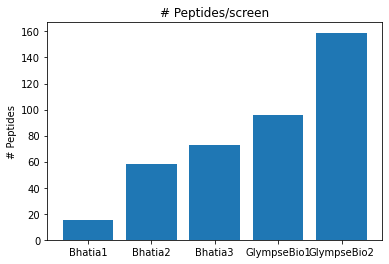

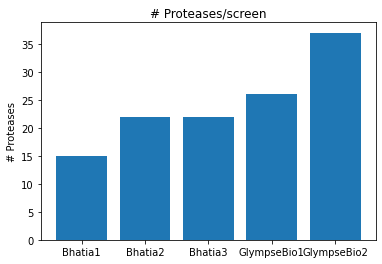

MMP13 in Bhatia1
MMP13 in Bhatia2
MMP13 in Bhatia3
MMP13 in GlympseBio1
MMP13 in GlympseBio2


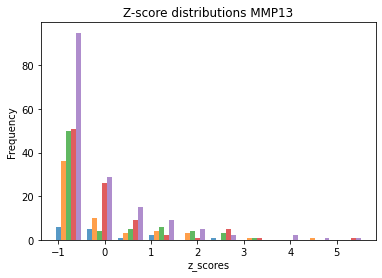

In [191]:
scr = DataLoader(protease = 'MMP13', z_threshold=4)

In [195]:
# Check that all substrates in the screens are found in the dictionary 
# Update these lists to rename other screens
keys_scr = ['Bhatia1', 'Bhatia2', 'Bhatia3', 'GlympseBio1', 'GlympseBio2']
files = ['Inputs/JesseScreen_updated.csv', 'Inputs/JaideepScreen_updated.csv', 
        'Inputs/CarmenScreen_updated.csv', 'Inputs/AndrewScreen_feb_updated.csv', 
        'Inputs/AndrewScreen_dec_updated.csv']
for i in np.arange(len(keys_scr)):
    screen_name = keys_scr[i] # Change this line to check with screen
    print('Checking:', screen_name)
    temp_subs = {}
    for pep_or in scr.substrates[screen_name]:
        for pep_final in names_dict:
            # print(names_dict[pep])
            if pep_or in names_dict[pep_final]:
                #print(pep_or, 'found in', pep_final)
                temp_subs[pep_or] = pep_final

    #print(temp_subs)

    # zip and check lengths match
    keys, values = zip(*temp_subs.items())
    print('#Substrates in ', screen_name,':', len(scr.substrates[screen_name]))
    print('#Substrates found:',len(keys))

    #Find substrates for which we dont have sequences and delete them
    temp_not_found=set(scr.substrates[screen_name]).difference(set(keys))
    temp_found=set(scr.substrates[screen_name]).intersection(set(keys))
    
    # Import screeen data
    raw = pd.read_csv(files[i], index_col= 'Substrate')
    raw = raw.groupby('Substrate').mean()
    # Make a copy of data and rename index with new names
    raw_updated = raw.copy()
    # Drop peptides for which we dont have any sequences

    if len(temp_not_found)>0:
        print('temp_not_found', list(temp_not_found))
        raw_updated = raw_updated.reset_index()
        raw_updated = raw_updated[raw_updated.Substrate.isin(temp_found)]
        raw_updated = raw_updated.set_index('Substrate')    
    raw_updated['PAA indices'] = values
    raw_updated = raw_updated.set_index('PAA indices')
    raw_updated.to_csv('Inputs/PAA/'+screen_name+'_PAA.csv')
    raw_updated


Checking: Bhatia1
#Substrates in  Bhatia1 : 15
#Substrates found: 15
Checking: Bhatia2
#Substrates in  Bhatia2 : 58
#Substrates found: 58
Checking: Bhatia3
#Substrates in  Bhatia3 : 73
#Substrates found: 73
Checking: GlympseBio1
#Substrates in  GlympseBio1 : 96
#Substrates found: 78
temp_not_found ['FX03', 'FX14', 'FX06', 'FX16', 'FX18', 'FX01', 'FX13', 'FX15', 'FX11', 'FX17', 'FX12', 'FX09', 'FX04', 'FX07', 'FX05', 'FX10', 'FX08', 'FX02']
Checking: GlympseBio2
#Substrates in  GlympseBio2 : 159
#Substrates found: 136
temp_not_found ['TQ59', 'FX15', 'FX17', 'FX11', 'FX06', 'FX01', 'FX07', 'FX05', 'SQ14B', 'FX02', 'SQ14A', 'FX14', 'FX16', 'PQ4B', 'FX12', 'FX09', 'FX10', 'FX03', 'FX18', 'FX13', 'PQ4A', 'FX04', 'FX08']
